### **Let's Begin:**

**Lets start by importing the required libraries.**

In [272]:
# Basic python libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get rid of warnings!
import warnings
warnings.filterwarnings('ignore')

# Deep learning libraries.
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,MaxPooling2D,Flatten,Conv2D,BatchNormalization,Activation
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

print('Above libraries have been imported.')

Above libraries have been imported.


**Seperate the Training and Validation Data.**

In [273]:
# Define the train and validataion data paths.
train_dir = '../input/fer2013/train'
val_dir = '../input/fer2013/test'

print('Data directories have been initialised.')

Data directories have been initialised.


**Have a look at our data.**

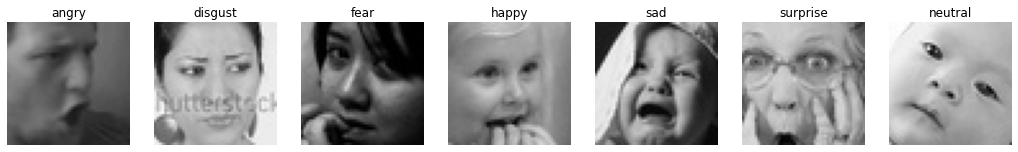

In [274]:
# Define the default image size.
img_size = 48

# Define the seven emotions provided in dataset.
emotion_list = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Plot the images with each distinct emotions.
plt.figure(figsize=(18,22))
i = 1
for expression in emotion_list:
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[59]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

**Perform some Data Augmentation on train and validations sets.**

In [186]:
batch_size = 64

datagen_train = ImageDataGenerator(rescale = 1./255,
#                                    validation_split = 0.2
                                  )

datagen_val = ImageDataGenerator(rescale = 1./255,
#                                  validation_split = 0.2
                                 )

print('Above data generator functions have been created.')

Above data generator functions have been created.


In [187]:
"""
Now apply the data augmentation to the images.
"""
# Training data.
train_set = datagen_train.flow_from_directory(directory=train_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=True,
#                                               subset = "training"
                                              )

# Validation data.
val_set = datagen_train.flow_from_directory(directory=val_dir,
                                            target_size=(img_size,img_size),
                                            batch_size = batch_size,
                                            color_mode = 'grayscale',
                                            class_mode = "categorical",
                                            shuffle=False,
#                                             subset = "validation"
                                            )

print('Train and Validation sets have been created.')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.


**Now lets create our custom CNN model.**

In [196]:
# First layer
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second layer
model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third layer   
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth layer
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# # Fifth layer
# model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())

# First fully connected layer
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


In [197]:
# Get model summary.
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_85 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_86 (Batc (None, 24, 24, 128)     

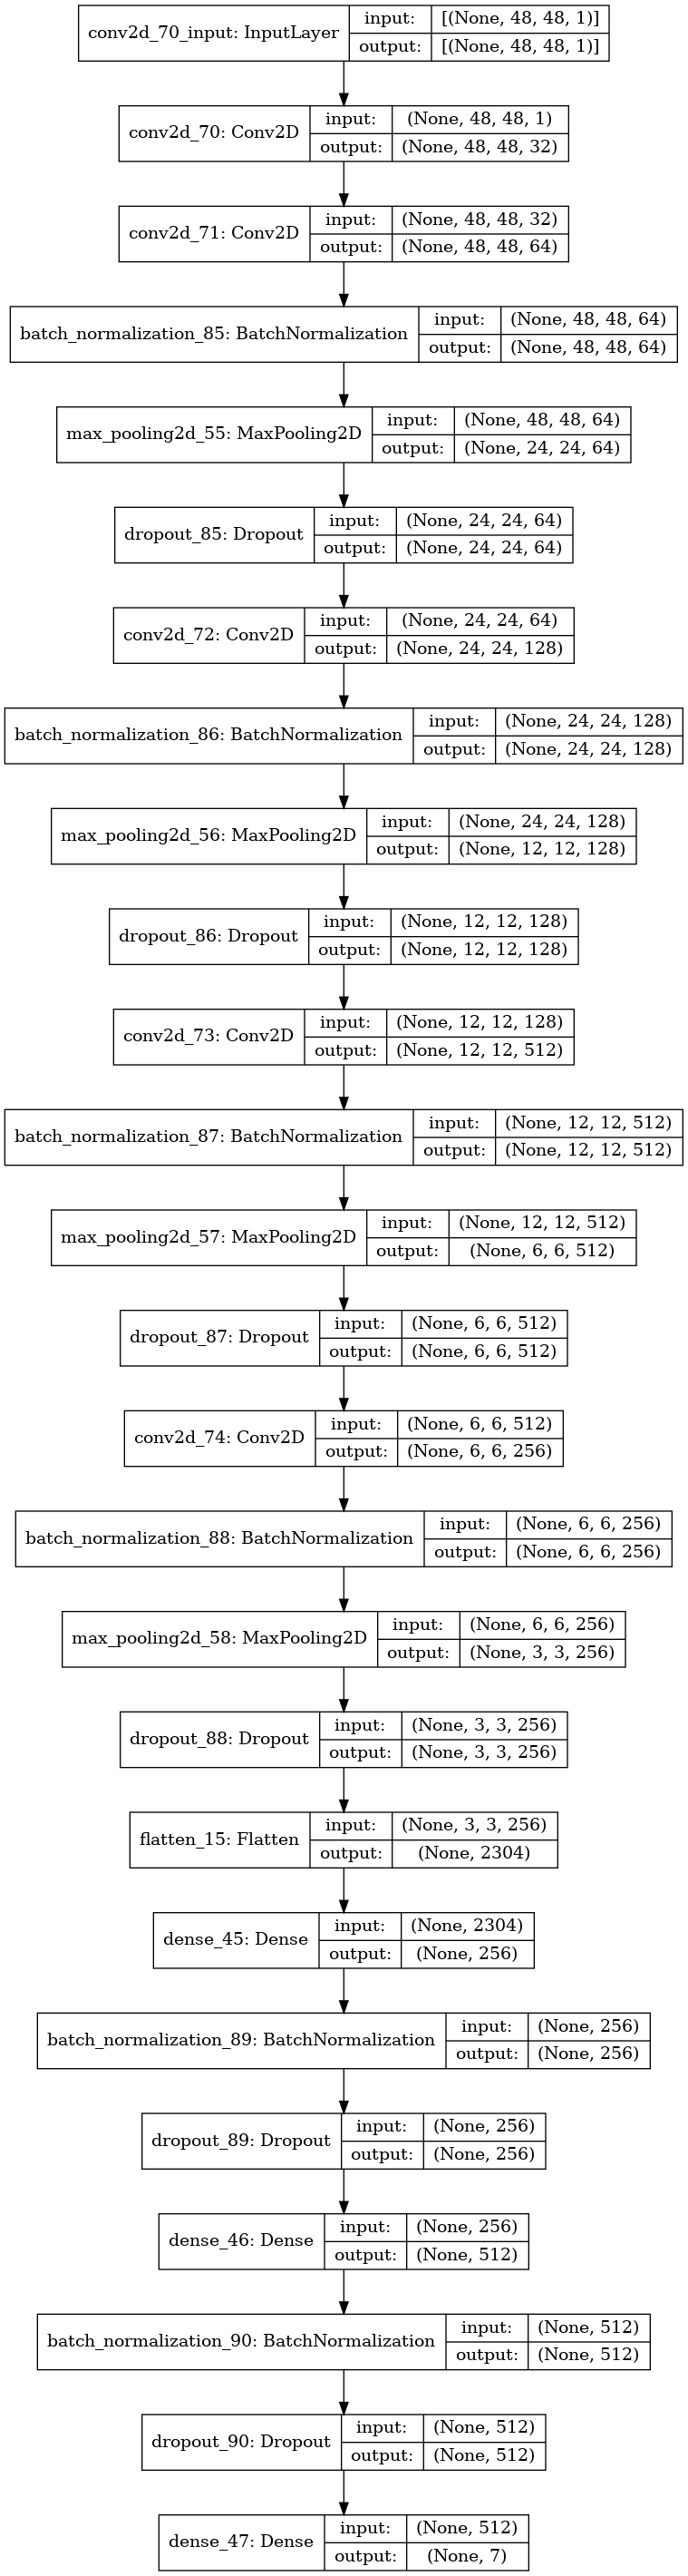

In [265]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**Now lets Train the model!**

In [198]:
history = model.fit_generator(generator = train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              validation_data = val_set,
                              validation_steps=val_set.n//val_set.batch_size,
                              # callbacks=callback_list,
                              epochs = 15)

print('Your model has been trained!!')

Epoch 1/15
448/448 [==============================] - 31s 68ms/step - loss: 2.0269 - accuracy: 0.2574 - val_loss: 2.1621 - val_accuracy: 0.2916
Epoch 2/15
448/448 [==============================] - 30s 67ms/step - loss: 1.5465 - accuracy: 0.4100 - val_loss: 1.4075 - val_accuracy: 0.4526
Epoch 3/15
448/448 [==============================] - 30s 68ms/step - loss: 1.3133 - accuracy: 0.5001 - val_loss: 1.2493 - val_accuracy: 0.5190
Epoch 4/15
448/448 [==============================] - 30s 66ms/step - loss: 1.2050 - accuracy: 0.5404 - val_loss: 1.1763 - val_accuracy: 0.5529
Epoch 5/15
448/448 [==============================] - 31s 70ms/step - loss: 1.1293 - accuracy: 0.5675 - val_loss: 1.2346 - val_accuracy: 0.5501
Epoch 6/15
448/448 [==============================] - 32s 72ms/step - loss: 1.0706 - accuracy: 0.5963 - val_loss: 1.2178 - val_accuracy: 0.5326
Epoch 7/15
448/448 [==============================] - 32s 72ms/step - loss: 1.0176 - accuracy: 0.6171 - val_loss: 1.1402 - val_accuracy:

**Plot the scores.**

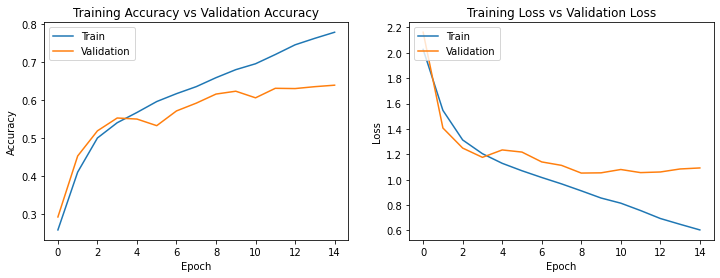

In [199]:
# Create plots for accuracy and loss.
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

(48, 48)


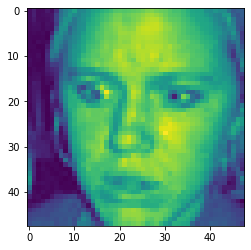

In [257]:
img = image.load_img("../input/fer2013/test/surprise/PrivateTest_14290563.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) 

In [258]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[1.231011e-12, 4.971608e-36, 0.0035806624, 1.2352963e-12, 0.4613243, 5.845356e-12, 0.53509504]


In [275]:
emotion_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [276]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Surprise


**Lets save the model and its weights for future uses.**

In [203]:
model.save('model_77.h5')

In [204]:
model.save_weights('model_weights_77.h5')